## ¿Es factible predecir el número de “Vistas” o “Me gusta” o “No me gusta”?


In [298]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
%matplotlib inline

In [299]:
Frvids = pd.read_csv('FRvideos_Clean.csv')
Frvids = Frvids.drop(columns=['Unnamed: 0'])

In [ ]:
Frvids.loc[Frvids['likes']==0]

In [301]:
varialbes = Frvids
varialbes.drop(['video_id','trending_date','title','channel_title','category_id','publish_time','tags'
,'thumbnail_link','comments_disabled','ratings_disabled','video_error_or_removed','description'
,'state','lat','lon','geometry','category_title'],axis='columns', inplace=True)


In [302]:
varialbes

,views,likes,dislikes,comment_count
0,212702,29282,1108,3817
1,432721,14053,576,1161
2,925222,85016,550,4303
3,141695,8091,72,481
4,141253,14354,202,417
...,...,...,...,...
35707,560827,8688,147,696
35708,58758,307,86,485
35709,264639,2011,999,1397
35710,47510,4601,61,615


In [303]:
X = Frvids[['views','dislikes','comment_count']]
y = Frvids['likes']

In [304]:
from sklearn.model_selection import train_test_split

In [305]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [306]:
from sklearn.linear_model import LinearRegression

In [307]:
lm = LinearRegression()

In [308]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [309]:
slope = lm.coef_  # w1
intercept = lm.intercept_ # w0

print("Las pendientes 'w1' del modelo son: ", slope)
print("El término independiente de la recta 'w0' es: ", intercept)

Las pendientes 'w1' del modelo son:  [0.01006135 4.77985676 7.31983909]
El término independiente de la recta 'w0' es:  -637.91692975362


In [310]:
coef_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coeficiente'])
coef_df

,Coeficiente
views,0.010061
dislikes,4.779857
comment_count,7.319839


In [311]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Y Predichos')

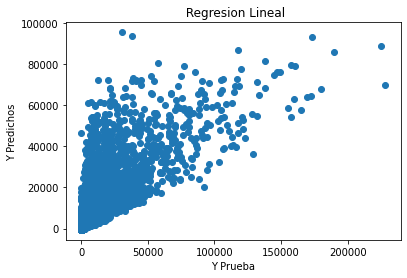

In [312]:
plt.scatter(y_test,predictions)
plt.title(" Regresion Lineal")
plt.xlabel('Y Prueba')
plt.ylabel('Y Predichos')

Text(0.5, 1.0, 'Cantidad de residuo por video')

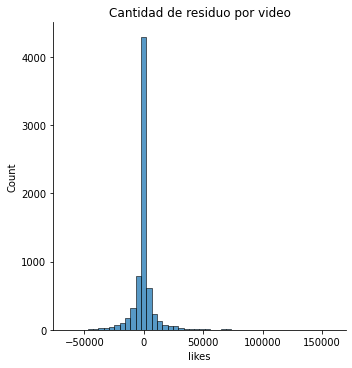

In [313]:
sns.displot((y_test-predictions),bins=50);
plt.title("Cantidad de residuo por video")

In [314]:
from sklearn import metrics

In [315]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 5024.686346716741
MSE: 121283400.82974611
RMSE: 11012.87432189009


## ¿Los videos en tendencia son los que mayor cantidad de comentarios positivos reciben?


In [316]:
media_like=Frvids['likes'].mean()
media_dislike=Frvids['dislikes'].mean()


In [317]:
def analize_sentiment(comment):
    if comment > media_like:
        return 1
    else:
        return 0

In [318]:
Frvids['polaridad'] = np.array([analize_sentiment(comment) for comment in Frvids['likes']])
Frvids.head()

,views,likes,dislikes,comment_count,polaridad
0,212702,29282,1108,3817,1
1,432721,14053,576,1161,1
2,925222,85016,550,4303,1
3,141695,8091,72,481,1
4,141253,14354,202,417,1


In [319]:
pos_com= [ i for index, i in enumerate(Frvids['likes']) if Frvids['polaridad'][index] > 0]
neg_com = [ i for index, i in enumerate(Frvids['likes']) if Frvids['polaridad'][index] == 0]

In [320]:
print("Percentaje de positivos : {}%".format(len(pos_com)*100/len(Frvids['likes'])))
print("Percentaje de negativos : {}%".format(len(neg_com)*100/len(Frvids['likes'])))

Percentaje de positivos : 23.25548835125448%
Percentaje de negativos : 76.74451164874552%


0    27407
1     8305
Name: polaridad, dtype: int64


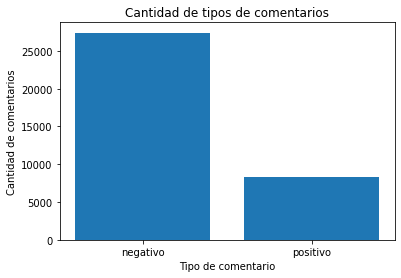

In [321]:
cantidad = Frvids['polaridad'].value_counts()
plt.xticks(rotation='horizontal')
plt.bar(['negativo','positivo'], cantidad.values)
plt.title("Cantidad de tipos de comentarios")
plt.xlabel("Tipo de comentario")
plt.ylabel("Cantidad de comentarios")

print(cantidad)